In [ ]:
#############################################################################################################################################################

In [ ]:
##################################The data set is invented to protect the privacy of the company's data, therefore, these data will not be generalized correc, But if you run real data it works

In [ ]:
#############################################################################################################################################################

In [ ]:
#installations

# load general python utilities
import math
import datetime
import string

from dateutil.relativedelta import *

# load modules for working with data
import pandas as pd
import numpy as np

# load modules for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# load modules for statistical computations
from patsy import dmatrices

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as sm


# ML Libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
# load media spends and sales volume data and save into data frame
media_spends_sales = pd.read_excel("/content/pruebas.xlsx")
# check for columns with missing data
media_spends_sales.isnull().any()

Calendar_Week            False
Paid_Views               False
Organic_Views            False
Google_Impressions       False
Email_Impressions        False
Facebook_Impressions     False
Affiliate_Impressions    False
Overall_Views            False
Sales                    False
dtype: bool

In [ ]:
# glimpse data values
media_spends_sales.head()

,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,2018-01-03,341648,341599,341550,341354,341452,341403,341354,341354
1,2018-01-04,341648,341599,341354,341354,341354,341402,341353,341354
2,2018-01-05,341648,341599,341158,341354,341256,341401,341352,341354
3,2018-01-06,341648,341599,340962,341354,341158,341400,341351,341354
4,2018-01-07,341648,341599,340766,341354,341060,341399,341350,341354


In [ ]:
# scale data to unit variance and zero mean

media_spends_sales_scaled = media_spends_sales.copy()

sc = StandardScaler()

media_spends_sales_scaled.loc[:, "Paid_Views":"Sales"] = sc.fit_transform( media_spends_sales_scaled.loc[:, "Paid_Views":"Sales"])
media_spends_sales_scaled.head()

,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,2018-01-03,0.0,0.0,1.697749,0.0,1.697749,1.697749,1.697749,0.0
1,2018-01-04,0.0,0.0,1.628453,0.0,1.628453,1.628453,1.628453,0.0
2,2018-01-05,0.0,0.0,1.559158,0.0,1.559158,1.559158,1.559158,0.0
3,2018-01-06,0.0,0.0,1.489862,0.0,1.489862,1.489862,1.489862,0.0
4,2018-01-07,0.0,0.0,1.420566,0.0,1.420566,1.420566,1.420566,0.0


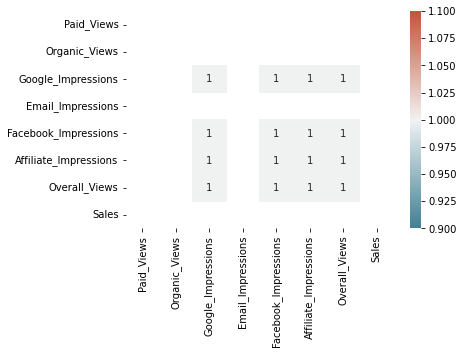

In [ ]:
# check for high correlations in data
corr = media_spends_sales_scaled.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),)

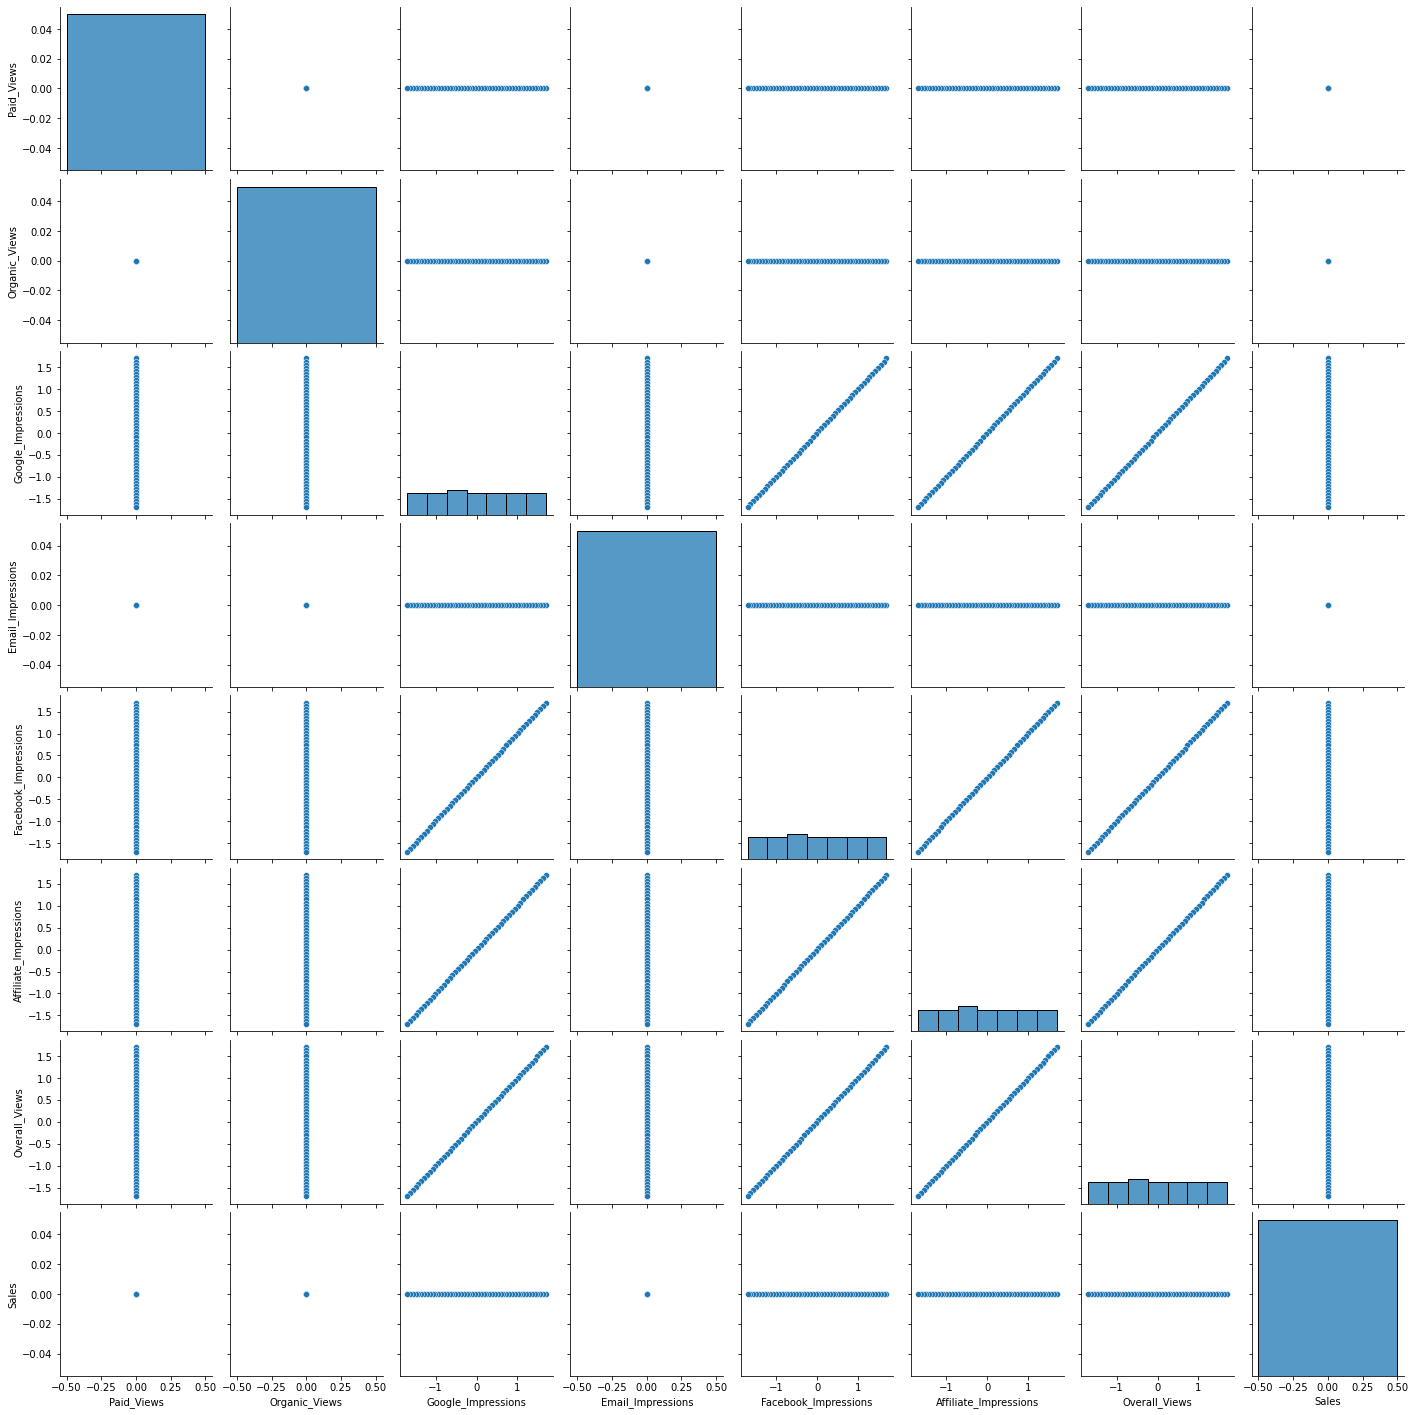

In [ ]:
# check for linear relationships between predictors and response
sns.pairplot(media_spends_sales_scaled)

In [ ]:
# sort data chronologically and ignore original indexes
media_spends_sales_scaled.sort_values(by="Calendar_Week", inplace=True)
media_spends_sales_scaled.head()

,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,2018-01-03,0.0,0.0,1.697749,0.0,1.697749,1.697749,1.697749,0.0
1,2018-01-04,0.0,0.0,1.628453,0.0,1.628453,1.628453,1.628453,0.0
2,2018-01-05,0.0,0.0,1.559158,0.0,1.559158,1.559158,1.559158,0.0
3,2018-01-06,0.0,0.0,1.489862,0.0,1.489862,1.489862,1.489862,0.0
4,2018-01-07,0.0,0.0,1.420566,0.0,1.420566,1.420566,1.420566,0.0


In [ ]:
x = media_spends_sales_scaled.loc[:, (media_spends_sales_scaled.columns != "Sales") & (media_spends_sales_scaled.columns != "Calendar_Week"),]
y = media_spends_sales_scaled["Sales"]

In [ ]:
# divide the dataset into test and train based on the test_ratio parameter

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Fitting the Regression model to the dataset

regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train,y_train)

# Predicting a new result with the Random Forest Regression

y_pred = regressor.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[15]]


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): nan
Accuracy: nan
